<a href="https://colab.research.google.com/github/KavindaKGD/DL_Final_Assignment/blob/dev%2FDinil/Mobilenet_buildings_streets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies
!pip install tensorflow matplotlib -q

# --- Imports
import os, zipfile, shutil, random, pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image

In [2]:
# --- Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# --- Dataset paths
ZIP_PATH = "/content/drive/MyDrive/DL Assignment/data.zip"
!unzip -q "$ZIP_PATH" -d /content/data


In [4]:

train_data_dir = "/content/data/data/seg_train"
test_data_dir  = "/content/data/data/seg_test"

In [5]:
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

In [6]:
# --- Load datasets
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

Found 4573 files belonging to 2 classes.
Using 3659 files for training.
Found 4573 files belonging to 2 classes.
Using 914 files for validation.
Found 938 files belonging to 2 classes.


In [7]:
class_names = train_data.class_names
print("Classes:", class_names)

Classes: ['buildings', 'street']


In [8]:
# --- Preprocessing
train_data = train_data.map(lambda x, y: (preprocess_input(x), y))
val_data   = val_data.map(lambda x, y: (preprocess_input(x), y))
test_data  = test_data.map(lambda x, y: (preprocess_input(x), y))

In [9]:
# --- Build MobileNet model
base_model = MobileNet(weights="imagenet", include_top=False, input_shape=IMAGE_SIZE + (3,))
base_model.trainable = False  # freeze convolutional base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")   # binary classification: street vs building
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

/tmp/ipython-input-1092007112.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights="imagenet", include_top=False, input_shape=IMAGE_SIZE + (3,))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [10]:
# --- Train
EPOCHS = 10
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 204ms/step - accuracy: 0.7022 - loss: 0.6132 - val_accuracy: 0.9322 - val_loss: 0.1827
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9108 - loss: 0.2231 - val_accuracy: 0.9398 - val_loss: 0.1652
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9271 - loss: 0.1778 - val_accuracy: 0.9442 - val_loss: 0.1657
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9338 - loss: 0.1709 - val_accuracy: 0.9409 - val_loss: 0.1648
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9358 - loss: 0.1611 - val_accuracy: 0.9431 - val_loss: 0.1655
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9439 - loss: 0.1516 - val_accuracy: 0.9420 - val_loss: 0.1663
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9457 - loss: 0.1467 - val_accuracy: 0.9398 - val_loss: 0.1861
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9369 - loss: 0.1624 - val_ac

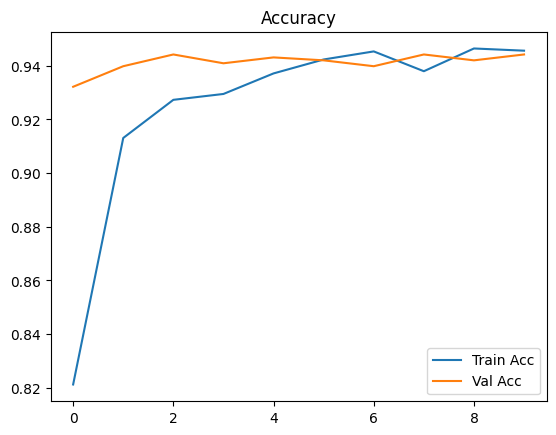

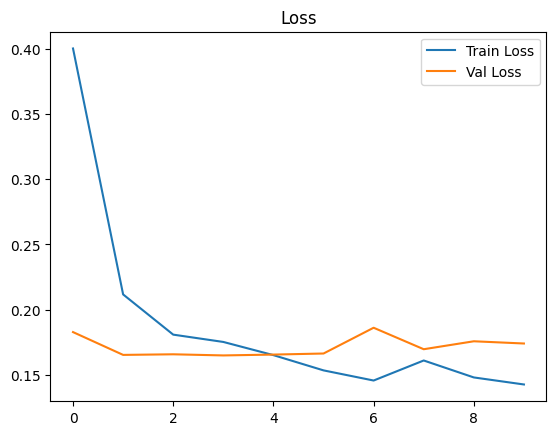

In [11]:
# --- Plot results
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()

In [12]:
# --- Evaluate on test set
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)

30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 322ms/step - accuracy: 0.9357 - loss: 0.1629
Test Accuracy: 0.9328358173370361


In [13]:
# --- Save model
model.save("/content/drive/MyDrive/DL Assignment/mobilenet_street_building.h5")

In [20]:
# --- Prediction on single image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    pred = model.predict(img_array)[0][0]
    label = "Building" if pred < 0.5 else "Street"

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {label} ({pred:.2f})")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


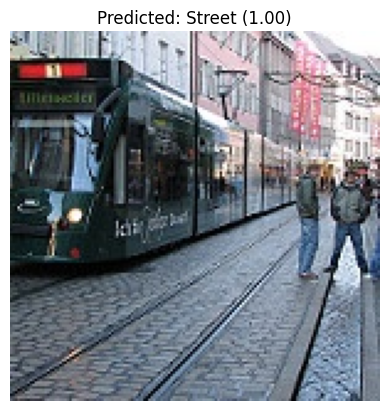

In [21]:
# Example: test with a random image from test set
sample_img = list(pathlib.Path(test_data_dir).rglob("*.jpg"))[0]
predict_image(str(sample_img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


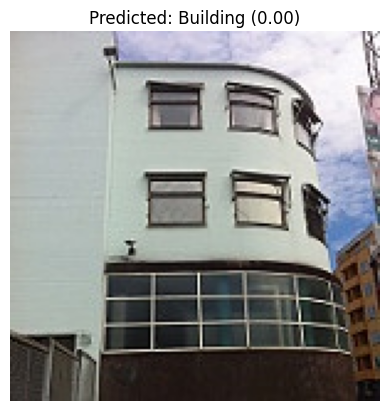

In [22]:
predict_image("/content/data/data/seg_test/buildings/20709.jpg")